# Intro to HDF5 data model

High-level overview of the HDF5 file structure and basic tools


## What is HDF5?

* HDF5 = Hierarchical Data Format Version 5
* A file format optimized for numeric data
* A hierarquichal structure to store information (like folders)
* A self-describing container: Metadata + Data
* A library with several functionalities (e.g. command line tools)
* It is high level from user side (easy access)
* It is low level from machine side (binary, compressible)
* Fast I/O, parallel read/write (!), very good for HPC
* Data can be read/written in chuncks, in-memory, out-of-memory  

Read more: [https://www.hdfgroup.org/solutions/hdf5/](https://www.hdfgroup.org/solutions/hdf5/) 

## How popular is it?

* Matlab `*.m` files **are** HDF5!
* NetCDF4 files **are** HDF5!
* Keras/TensorFlow saves ML model weights to HDF5
* ICESat-2 data comes in HDF5

## Write data to HDF5

Let's create some fake data

In [8]:
%matplotlib inline

In [9]:
import h5py
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

print(x)

[-1.01791208e+00  8.83170063e-01  3.70979527e-01 -6.38485372e-01
 -5.22138229e-01  1.00362897e+00  4.80178952e-01  6.89631750e-01
  3.87285972e-01  3.36495372e-01 -8.22308403e-01 -3.77317431e-01
 -1.50560026e-01 -1.50085960e-01  5.82606067e-03  1.63083933e-01
 -6.16063476e-01  5.41810979e-01 -9.71970981e-02  7.40527247e-02
 -5.95916402e-01  7.04987429e-01  1.21482279e+00  8.47049292e-02
 -1.54059809e+00  5.06342505e-01 -1.41335328e-01  1.80848111e+00
 -7.00667804e-01  8.15791408e-01 -1.27487973e+00 -9.87970158e-01
 -1.43325635e-01 -1.15356875e-01 -9.64811133e-01  1.57200289e-01
 -1.02963851e+00  1.28268334e+00 -5.26231575e-03 -1.05083920e+00
 -1.01566539e+00  8.93971339e-01 -7.29671271e-01 -1.16952559e+00
 -3.07179680e-02  1.24734916e+00  5.23401671e-01  5.44578880e-01
  1.32864174e+00 -4.76753532e-01  9.61814418e-01 -1.60420852e+00
  7.87813626e-01 -1.96690427e+00 -9.32840072e-02  1.01218445e+00
  1.40364101e-03  9.43123321e-01 -1.36917025e+00 -7.84064541e-01
 -1.08795697e+00 -8.83517

Save 1D arrays to file

In [10]:
with h5py.File('myfile.h5', 'w') as f:  # open file in write mode
    f['x'] = x                          # write data
    f['y'] = y
    f['z'] = z

In [11]:
!ls *.h5  # Check the file was created

myfile.h5


The HDF5 library comes with some useful command-line tools  
There is no need to write code to inspect an HDF5 file!

In [12]:
!h5ls myfile.h5  # inspect the file w/command-line tools

x                        Dataset {100}
y                        Dataset {100}
z                        Dataset {100}


> **NOTE:**  
> We wil see more sophysticated command-line tools below.


## Read data from HDF5

Load data (in memory) vs. get pointer (out of memory)

In [13]:
with h5py.File('myfile.h5', 'r') as f:  # open file
    x = f['x'][:]                       # read data into memory
    y = f['y']                          # get pointer to data on disk
    
    print('x (in mem): ', x)
    print('y (on disk):', y)
    print('')
    print('x (in mem): ', type(x))
    print('y (on disk):', type(y))
    print('')
    print('x (in mem): ', x.shape)
    print('y (on disk):', y.shape)  # same info from out-of-memory array

x (in mem):  [-1.01791208e+00  8.83170063e-01  3.70979527e-01 -6.38485372e-01
 -5.22138229e-01  1.00362897e+00  4.80178952e-01  6.89631750e-01
  3.87285972e-01  3.36495372e-01 -8.22308403e-01 -3.77317431e-01
 -1.50560026e-01 -1.50085960e-01  5.82606067e-03  1.63083933e-01
 -6.16063476e-01  5.41810979e-01 -9.71970981e-02  7.40527247e-02
 -5.95916402e-01  7.04987429e-01  1.21482279e+00  8.47049292e-02
 -1.54059809e+00  5.06342505e-01 -1.41335328e-01  1.80848111e+00
 -7.00667804e-01  8.15791408e-01 -1.27487973e+00 -9.87970158e-01
 -1.43325635e-01 -1.15356875e-01 -9.64811133e-01  1.57200289e-01
 -1.02963851e+00  1.28268334e+00 -5.26231575e-03 -1.05083920e+00
 -1.01566539e+00  8.93971339e-01 -7.29671271e-01 -1.16952559e+00
 -3.07179680e-02  1.24734916e+00  5.23401671e-01  5.44578880e-01
  1.32864174e+00 -4.76753532e-01  9.61814418e-01 -1.60420852e+00
  7.87813626e-01 -1.96690427e+00 -9.32840072e-02  1.01218445e+00
  1.40364101e-03  9.43123321e-01 -1.36917025e+00 -7.84064541e-01
 -1.08795697

## Append data to HDF5

Let's add some data with specific paths (groups)

In [14]:
with h5py.File('myfile.h5', 'a') as f:
    f['/path/to/data/vec'] = z**2
    f['/path/to/data/mat'] = z.reshape(10,10)

> **NOTE:**  
> `path`, `to` and `data` are groups  
> `vec` and `mat` are datasets  

In [15]:
# Inspect file from the command line
!h5ls -r myfile.h5

/                        Group
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Now our HDF5 file has some structure!

## Add metadata to HDF5

Let's first inpect the metadata that's added by default

In [16]:
# Inspect Metadate from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
            }
            DATASET "vec" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
            }
         }
      }
   }
   DATASET "x" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "y" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "z" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
}
}


Let's add our own metadata

In [17]:
with h5py.File('myfile.h5', 'a') as f:
    g = f['/path']               # pointer to group 'path'
    d = f['/path/to/data/mat']   # pointer to dataset 'mat'
    
    # Metadata for the group
    g.attrs['Description'] = 'This is a group'
    g.attrs['Author'] = 'Your name'
    g.attrs['email'] = 'yourname@domain.com'
    
    # Metadata for the data
    d.attrs['Description'] = 'This is an array'
    d.attrs['Date'] = '2020-07-01'
    d.attrs['Version'] = '1.2'

In [21]:
# Inspect Metadata from the commaand line
!h5dump --header myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      ATTRIBUTE "Author" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "Description" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "email" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
               ATTRIBUTE "Date" {
                  DATATYPE  H5T_S

## Copy some data to another HDF5

In [45]:
%%bash

h5copy -i myfile.h5 -o myfile2.h5 -s x -d x

h5copy -i myfile.h5 -o myfile2.h5 -s /path/to/data/mat -d mat

ls *.h5
h5ls -r myfile2.h5

myfile.h5
myfile2.h5
/                        Group
/mat                     Dataset {10, 10}
/x                       Dataset {100}


Let's check the differences between original and copy files 

In [59]:
!h5diff -v myfile.h5 myfile2.h5


file1     file2
---------------------------------------
    x      x    /              
           x    /mat           
    x           /path          
    x           /path/to       
    x           /path/to/data  
    x           /path/to/data/mat
    x           /path/to/data/vec
    x      x    /x             
    x           /y             
    x           /z             

group  : </> and </>
0 differences found
dataset: </x> and </x>
0 differences found


## Inspect HDF5 from Python

Let's do the same as above but using Python code

In [61]:
f = h5py.File('myfile.h5', 'r')  # keep it open

print(f.keys())  # Inspect base groups quickly

<KeysViewHDF5 ['path', 'x', 'y', 'z']>


Inspect the full structure w/metadata

In [62]:
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)        

path
    Author: Your name
    Description: This is a group
    email: yourname@domain.com
path/to
path/to/data
path/to/data/mat
    Date: 2020-07-01
    Description: This is an array
    Version: 1.2
path/to/data/vec
x
y
z


In [63]:
f.close()

## Create an extendable dataset

Create an empty container (called `grids`) extendable in the 3rd dim

In [64]:
with h5py.File('myfile.h5', 'a') as f:
    dset = f.create_dataset(
        "grids", 
        (10,10,5), 
        maxshape=(10,10,None), 
        dtype='f4', 
        compression='gzip')

Check that our created container has an infinity dimension

In [65]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Create a bunch of 2D grids to save to our empty container

In [66]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10

(5, 10, 10)


Save grids one at a time and close the file

In [67]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g

Read in (select) specific grids with fancy indexing

In [68]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


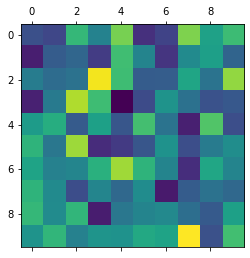

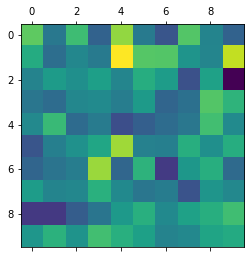

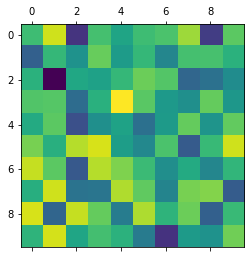

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot each grid to check dimensions are right
[plt.matshow(mygrids[:,:,k]) for k in range(mygrids.shape[2])]
plt.show()

## What about the cloud?

The HDF Group (the organization behind HDF5) offers a cloud solution for HDF5:

- [Highly Scalable Data Service (HSDS)](https://www.hdfgroup.org/solutions/highly-scalable-data-service-hsds/) - an interface for reading and writing HDF5 within object-based storage environments such as the Cloud.

The HDF Group also offers commercial product services around HSDS:

- Kita Lab, ... 

## The Zarr library (a newcomer)

Say something about Zarr... why? what's different? what's better?

- `h5py` and `zarr` have an identical interface to access the data

## Final thoughts on HDF5

- Many small files is usually more practical than a few large ones (for processing)
- Read/Write is faster on smaller files (faster queries)
- Network transfer is usually faster with a bunch of smaller files
- Storing a lot of data into a single file is susceptible to corruption
- Many small files simplifies (embarrasingly) parallelization

## Bonus: HDFView Software

[HDFView](https://www.hdfgroup.org/downloads/hdfview/) is a visual tool written in Java for browsing and editing HDF5 and HDF4 files. You can:

- View a file hierarchy in a tree structure
- Create new files, add or delete groups and datasets
- View and modify the content of a dataset
- Add, delete and modify attributes